<a href="https://colab.research.google.com/github/YLiu95/ml/blob/main/miniproject_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECS7020P mini-project submission

The mini-project consists of two components:


1.   **Basic solution** [6 marks]: Using the MLEnd Hums and Whistles dataset, build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars).
2.   **Advanced solution** [10 marks]: There are two options. (i) Formulate a machine learning problem that can be attempted using the MLEnd Hums and Whistles dataset and build a solution model. (ii) Create a product that uses the functionality provided by a model trained on the MLEnd Hums and Whistles dataset (e.g. a simple App that predicts the label Harry or StarWars when you hum to it).  

The submission will consist of two Jupyter notebooks, one for the basic solution and another one for advanced solution. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zipped and submitted toghether**.

Each uploaded notebook should consist of:

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks will not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience.

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Yishan Liu
**Student ID**:  200267117



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

- Using the MLEnd Hums and Whistles dataset, build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Potter or StarWars).
- What's interesting?
    - The data are collected from my fellow ECS7020P classmates.
    - There are hums and whistles data. Both will be used to build the machine learning pipeline.

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and intermediate data moving from one stage to the next. Note that your pipeline does not need to include all the stages.

- Pipeline describtion:
    - Data preprocessing:
        - Correct the wrong file names in `Potter_1` and `StarWars_1` so that information can be extracted using automation.
    - Transformation stage:
        - Extract 4 features from the data:
            1.   Power.
            2.   Pitch mean.
            3.   Pitch standard deviation.
            4.   Fraction of voiced region.
        - Creates a NumPy array containing the 4 audio features used as predictors (`X`) and a binary label (`y`), that indicates the name of the song.
    - Modelling:
        - Fit several machine learning models to the data for the predictive task of identifying the name of the song.
        - Select the best one accroding to the quality metric: accuracy.

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output.

- Extract 4 featrues from the audio data:    
    1.   Power.
    2.   Pitch mean.
    3.   Pitch standard deviation.
    4.   Fraction of voiced region.
    - Creates a NumPy array containing the 4 audio features used as predictors (`X`) and a binary label (`y`), that indicates the name of the song.
- Input: original audio data
- Output: two NumPy arrays where `X` is the predictors containing the 4 audio features, `y` is the binary label that indicates the name of the song.

# 5 Modelling

Describe the ML models that you will implement.

We will use several models:
- Support vector machine (SVM)
- Classifier implementing the k-nearest neighbors vote (KNeighborsClassifier)
- Random forest classifier
- Multi-layer Perceptron classifier (MLPClassifier)

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

We will use the 70% of the dataset with four features generated from the original `Potter_1` and `StarWars_1` data to train the models. The rest 30% will be used to validate the model.

##Clean the data

We will import libriaries here. Some libriaries are commented out because they are only needed once.

- We will store the processed somewhere else and will not generate processed data every time we run the notebook.

In [ ]:
# from google.colab import drive

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# import os, sys, re, pickle, glob
# import urllib.request
# import zipfile

# import IPython.display as ipd
# from tqdm import tqdm
# import librosa

# drive.mount('/content/drive')

Mounted at /content/drive


Check how many audio files we have.

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/basic/*.wav'
files = glob.glob(sample_path)
len(files)

416

There are 416 samples in the dataset.

We can create a Pandas DataFrame that collects the information that we can extract from the names of the audio files.

Use `try expect` statement to detact wrong file names and correct them, so that all file names are correct.

In [ ]:
basic_table = []

try:
    for file in files:
        file_name = file.split('/')[-1]
        participant_ID = file.split('/')[-1].split('_')[0]
        interpretation_type = file.split('/')[-1].split('_')[1]
        interpretation_number = file.split('/')[-1].split('_')[2]
        song = file.split('/')[-1].split('_')[3].split('.')[0]
        basic_table.append([file_name,participant_ID,interpretation_type,
                            interpretation_number,song])
except:
    print(file_name)
finally:
  print("The 'try except' is finished")

display(basic_table[0:5])
print('length of basic_table: ', len(basic_table))
basic_df = pd.DataFrame(basic_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id')
display(basic_df.head())
print('length of basic_df: ', len(basic_df))

The 'try except' is finished


[['S51_hum_2_Potter.wav', 'S51', 'hum', '2', 'Potter'],
 ['S52_hum_2_Potter.wav', 'S52', 'hum', '2', 'Potter'],
 ['S52_whistle_2_Potter.wav', 'S52', 'whistle', '2', 'Potter'],
 ['S53_hum_1_Potter.wav', 'S53', 'hum', '1', 'Potter'],
 ['S53_hum_2_Potter.wav', 'S53', 'hum', '2', 'Potter']]

length of basic_table:  416


,participant,interpretation,number,song
file_id,,,,
S51_hum_2_Potter.wav,S51,hum,2,Potter
S52_hum_2_Potter.wav,S52,hum,2,Potter
S52_whistle_2_Potter.wav,S52,whistle,2,Potter
S53_hum_1_Potter.wav,S53,hum,1,Potter
S53_hum_2_Potter.wav,S53,hum,2,Potter


length of basic_df:  416


Check if all song information is correct.

In [ ]:
basic_df['song'].value_counts()

Potter           169
StarWars         155
[Potter]          22
[StarWars]        21
Starwars          12
potter             7
starwars           5
Potter             4
[potter]           4
Star wars          2
StarWar            2
[Starwars]         2
starwar            2
[ Star Wars ]      2
star wars          2
StarsWars          2
Potterwav          1
harry potter       1
[StatWars]         1
Name: song, dtype: int64

There are many incorrect song names. Correct them with below code.

In [ ]:
basic_df = basic_df.replace('[Potter]', 'Potter')
basic_df = basic_df.replace('potter', 'Potter')
basic_df = basic_df.replace('Potter ', 'Potter')
basic_df = basic_df.replace('[potter]', 'Potter')
basic_df = basic_df.replace('Potterwav', 'Potter')
basic_df = basic_df.replace('harry potter', 'Potter')
basic_df = basic_df.replace('[StarWars]', 'StarWars')
basic_df = basic_df.replace('Starwars', 'StarWars')
basic_df = basic_df.replace('starwars', 'StarWars')
basic_df = basic_df.replace('StarWar', 'StarWars')
basic_df = basic_df.replace('StarsWars', 'StarWars')
basic_df = basic_df.replace('[Starwars]', 'StarWars')
basic_df = basic_df.replace('[ Star Wars ]', 'StarWars')
basic_df = basic_df.replace('star wars', 'StarWars')
basic_df = basic_df.replace('Star wars', 'StarWars')
basic_df = basic_df.replace('starwar', 'StarWars')
basic_df = basic_df.replace('[StatWars]', 'StarWars')

Check again if all song names are correct.

In [ ]:
basic_df['song'].value_counts()

Potter      208
StarWars    208
Name: song, dtype: int64

Now, all song names are correct.

Check if the interpretation type are correct.

In [ ]:
basic_df['interpretation'].value_counts()

hum        303
whistle     87
Hum         17
Whistle      7
whisle       2
Name: interpretation, dtype: int64

There are many incorrect interpertation types, correct them with below code.

In [ ]:
basic_df = basic_df.replace('Hum', 'hum')
basic_df = basic_df.replace('Whistle', 'whistle')
basic_df = basic_df.replace('whisle', 'whistle')

Check again if all interretation types are correct.

In [ ]:
basic_df['interpretation'].value_counts()

hum        320
whistle     96
Name: interpretation, dtype: int64

Now, all interpretation types are correct.

Download basic_df, so we do not have to generate it next time we open the notebook.

In [ ]:
from google.colab import files

basic_df.to_csv('basic_df.csv')
files.download('basic_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Extract four features

Define a new function that gets the pitch of an audio signal.

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

The next cell defines a function that takes a number of files and creates a NumPy array containing the 4 audio features used as predictors (`X`) and a binary label (`y`), that indicates whether the type of interpretation is Potter (`y=1`) or StarWars (`y=0`).

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    #print(file_name)
    #print(labels_file.loc[fileID]['interpretation'])
    #print(labels_file.loc[fileID]['interpretation']=='hum')
    #yi = list(labels_file.loc[fileID]['interpretation'])[0]=='hum'
    yi = labels_file.loc[fileID]['song']=='Potter'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)

    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

Let's apply `getXy` to the subsample and obtain the NumPy predictor array (`X`) and a binary label (`y`).

In [ ]:
X,y = getXy(files, labels_file=basic_df, scale_audio=True, onlySingleDigit=True)

The next cell shows the shape of `X` and `y` and prints the labels vector `y`:

In [ ]:
print('The shape of X is', X.shape)
print('The shape of y is', y.shape)
print('The labels vector is', y)

Transfer `X` to a pandas DataFrame.

In [ ]:
X_df = pd.DataFrame(X, columns = ['power','pitch_mean','pitch_std',
                                'voiced_fr'])
X_df.head()

Check if the dataset is balanced.

In [ ]:
print(' The number of potter recordings is ', np.count_nonzero(y))
print(' The number of starwars recordings is ', y.size - np.count_nonzero(y))

The dataset is balanced.

Download `X_df` so that we do not have to run the whole data transformation process again to generate `X`.

In [ ]:
X_df.to_csv('X_df.csv')
files.download('X_df.csv')

Convert y to pandas DataFrame and download y_df so we do not have to generate y again.

In [ ]:
y_df = pd.DataFrame(y, columns = ['potter?'])
y_df.head()

In [ ]:
y_df.to_csv('y_df.csv')
files.download('y_df.csv')

###Load data from GitHub
Next time we open the notebook, we will import`basic_df`, `X_df` and `y_df` from GitHub, where we stored them.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
basic_df = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/main/basic_df.csv')
basic_df.head()

,file_id,participant,interpretation,number,song
0,S51_hum_2_Potter.wav,S51,hum,2,Potter
1,S52_hum_2_Potter.wav,S52,hum,2,Potter
2,S52_whistle_2_Potter.wav,S52,whistle,2,Potter
3,S53_hum_1_Potter.wav,S53,hum,1,Potter
4,S53_hum_2_Potter.wav,S53,hum,2,Potter


In [ ]:
X_df = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/mini-pj-basic/X_df.csv')
X_df = X_df.drop('Unnamed: 0', axis=1)
X_df.head()

,power,pitch_mean,pitch_std,voiced_fr
0,0.044101,252.489791,66.465793,0.819092
1,0.033427,305.648076,65.209763,0.708699
2,0.042696,390.149178,25.598693,0.676776
3,0.038379,180.160892,47.528620,0.817925
4,0.034483,187.109414,48.174835,0.801676


Convert DataFrame `X_df` to numpy array `X`.

In [ ]:
X = X_df.to_numpy()
print('first five rows of X: \n', X[0:5],'\n')
print('shape of X: ', X.shape)

first five rows of X: 
 [[4.41013154e-02 2.52489791e+02 6.64657927e+01 8.19091609e-01]
 [3.34269091e-02 3.05648076e+02 6.52097627e+01 7.08699122e-01]
 [4.26958786e-02 3.90149178e+02 2.55986934e+01 6.76775738e-01]
 [3.83793310e-02 1.80160892e+02 4.75286203e+01 8.17925194e-01]
 [3.44831146e-02 1.87109414e+02 4.81748352e+01 8.01675978e-01]] 

shape of X:  (416, 4)


In [ ]:
y_df = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/mini-pj-basic/y_df.csv')
y_df = y_df.drop('Unnamed: 0', axis=1)
y_df.head()

,potter?
0,True
1,True
2,True
3,True
4,True


Convert DataFrame `y_df` to numpy array `y`.

In [ ]:
y = y_df.to_numpy()
print('unique values in y: \n', np.unique(y),'\n')
print('lenght of y: ', len(y))

unique values in y: 
 [False  True] 

lenght of y:  416


We will split the dataset defined by X and y into a training set and a validation set.
- 70% of the dataset will be training data.
- 30% of the dataset will be vaidation data.
- There will be enough data for both training and validation purpose.
- The code will be commented out because we only need it once.

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

We will:
- Convert the training and validation data to Pandas DataFrame
- Download the DataFrame
- Upload the DataFrame to GitHub
- Load the DataFrame from GitHub so we do not have to generate training and validation data every time we open the notebook
- Convert the DataFrame back to numpy arrays.

In [ ]:
# X_train = pd.DataFrame(X_train, columns = ['power','pitch_mean','pitch_std',
#                                 'voiced_fr'])
# X_val = pd.DataFrame(X_val, columns = ['power','pitch_mean','pitch_std',
#                                 'voiced_fr'])
# y_train = pd.DataFrame(y_train, columns=['potter?'])
# y_val = pd.DataFrame(y_val, columns=['potter?'])

# X_train.to_csv('X_train.csv')
# files.download('X_train.csv')
# X_val.to_csv('X_val.csv')
# files.download('X_val.csv')
# y_train.to_csv('y_train.csv')
# files.download('y_train.csv')
# y_val.to_csv('y_val.csv')
# files.download('y_val.csv')

In [ ]:
X_train = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/main/X_train.csv')
X_train = X_train.drop('Unnamed: 0', axis=1)
display(X_train.head())
X_val = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/main/X_val.csv')
X_val = X_val.drop('Unnamed: 0', axis=1)
display(X_val.head())
y_train = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/main/y_train.csv')
y_train = y_train.drop('Unnamed: 0', axis=1)
display(y_train.head())
y_val = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/main/y_val.csv')
y_val = y_val.drop('Unnamed: 0', axis=1)
display(y_val.head())

,power,pitch_mean,pitch_std,voiced_fr
0,0.039519,321.544507,17.415083,0.784012
1,0.044215,365.884451,67.102433,0.900291
2,0.070562,218.934385,78.965319,0.620014
3,0.005779,385.549035,28.846161,0.567371
4,0.025150,413.732772,20.644287,0.551938


,power,pitch_mean,pitch_std,voiced_fr
0,0.020151,173.859162,36.710930,0.710335
1,0.011814,396.268476,33.924044,0.542453
2,0.026797,264.794867,46.879175,0.793903
3,0.048044,207.900999,43.350682,0.747671
4,0.093276,184.280074,27.611400,0.935164


,potter?
0,True
1,True
2,True
3,True
4,True


,potter?
0,True
1,True
2,False
3,False
4,True


In [ ]:
X_train = X_train.to_numpy()
display(X_train[0:5])
X_val = X_val.to_numpy()
display(X_val[0:5])
y_train = y_train.to_numpy()
display(y_train[0:5])
y_val = y_val.to_numpy()
display(y_val[0:5])

array([[3.95191238e-02, 3.21544507e+02, 1.74150827e+01, 7.84012298e-01],
       [4.42152780e-02, 3.65884451e+02, 6.71024329e+01, 9.00291121e-01],
       [7.05620336e-02, 2.18934385e+02, 7.89653186e+01, 6.20013523e-01],
       [5.77912653e-03, 3.85549035e+02, 2.88461611e+01, 5.67370721e-01],
       [2.51504885e-02, 4.13732772e+02, 2.06442869e+01, 5.51937984e-01]])

array([[2.01510066e-02, 1.73859162e+02, 3.67109302e+01, 7.10334789e-01],
       [1.18144864e-02, 3.96268476e+02, 3.39240441e+01, 5.42452830e-01],
       [2.67973148e-02, 2.64794867e+02, 4.68791746e+01, 7.93903247e-01],
       [4.80442803e-02, 2.07900999e+02, 4.33506823e+01, 7.47670807e-01],
       [9.32762114e-02, 1.84280074e+02, 2.76114004e+01, 9.35163997e-01]])

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

array([[ True],
       [ True],
       [False],
       [False],
       [ True]])

##Generate 2 principle components

Use `PCA` from `sklearn` to generate 2 principle components from `X_df`.
- We first scale `X_df` using `preprocessing` from `sklearn`.
- Then, generated 2 principle components from the scaled data.
- Next, we calculate the explained variance ratios for the two principle components.
- Finally, we plot the scatterplot of the principal components.

shape of projected_X:  (416, 2)
explained variance ratio of principle component 1 (PC1):  33.6 %
explained variance ratio of principle component 2 (PC2):  28.48 %


Text(0, 0.5, 'PC2 - 28.48 %')

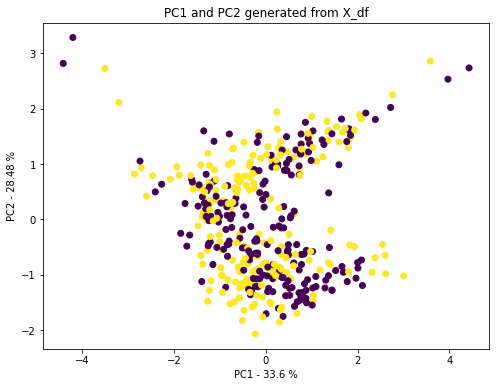

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X_df)
pca = PCA(n_components=2)
pca.fit(scaled_X)
projected_X = pca.transform(scaled_X)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)

print('shape of projected_X: ', projected_X.shape)
print('explained variance ratio of principle component 1 (PC1): ', per_var[0],'%')
print('explained variance ratio of principle component 2 (PC2): ', per_var[1],'%')
plt.figure(figsize=(8,6))
plt.scatter(projected_X[:,0], projected_X[:,1], c=y)
plt.title('PC1 and PC2 generated from X_df')
plt.xlabel('PC1 - 33.6 %')
plt.ylabel('PC2 - 28.48 %')

From the scatterplot, we can see that it is still diffcult to visually seperate `Potter` and `StarWars` after generating two principle components from `X_df`.

##Seperate hum data

Create DataFrame `hum` by adding `interpretation` type in `basic_df` to `X_df`

In [ ]:
basic_df.reset_index(inplace=True)

In [ ]:
hum = X_df.join(basic_df['interpretation'])
hum = hum.groupby(hum.interpretation).get_group('hum')
hum.head()

,power,pitch_mean,pitch_std,voiced_fr,interpretation
0,0.044101,252.489791,66.465793,0.819092,hum
1,0.033427,305.648076,65.209763,0.708699,hum
3,0.038379,180.160892,47.528620,0.817925,hum
4,0.034483,187.109414,48.174835,0.801676,hum
5,0.019726,190.417149,50.864984,0.761286,hum


Check if all `interpretation` type in `hum` are hum.

In [ ]:
hum['interpretation'].value_counts()

hum    320
Name: interpretation, dtype: int64

All `interpretation` type in `hum` are hum.

Drop `interpretation` column in `hum`.

In [ ]:
hum = hum.drop('interpretation', axis=1)
display(hum.head())
print('shape of hum: ', hum.shape)

,power,pitch_mean,pitch_std,voiced_fr
0,0.044101,252.489791,66.465793,0.819092
1,0.033427,305.648076,65.209763,0.708699
3,0.038379,180.160892,47.528620,0.817925
4,0.034483,187.109414,48.174835,0.801676
5,0.019726,190.417149,50.864984,0.761286


shape of hum:  (320, 4)


##Visualisation

We can not visuallise 4D space.
- Therefore, we plot scatter plots for any two features and colour code the points using the label `y_df`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'scatter for pitch standard deviation and fraction of voiced region')

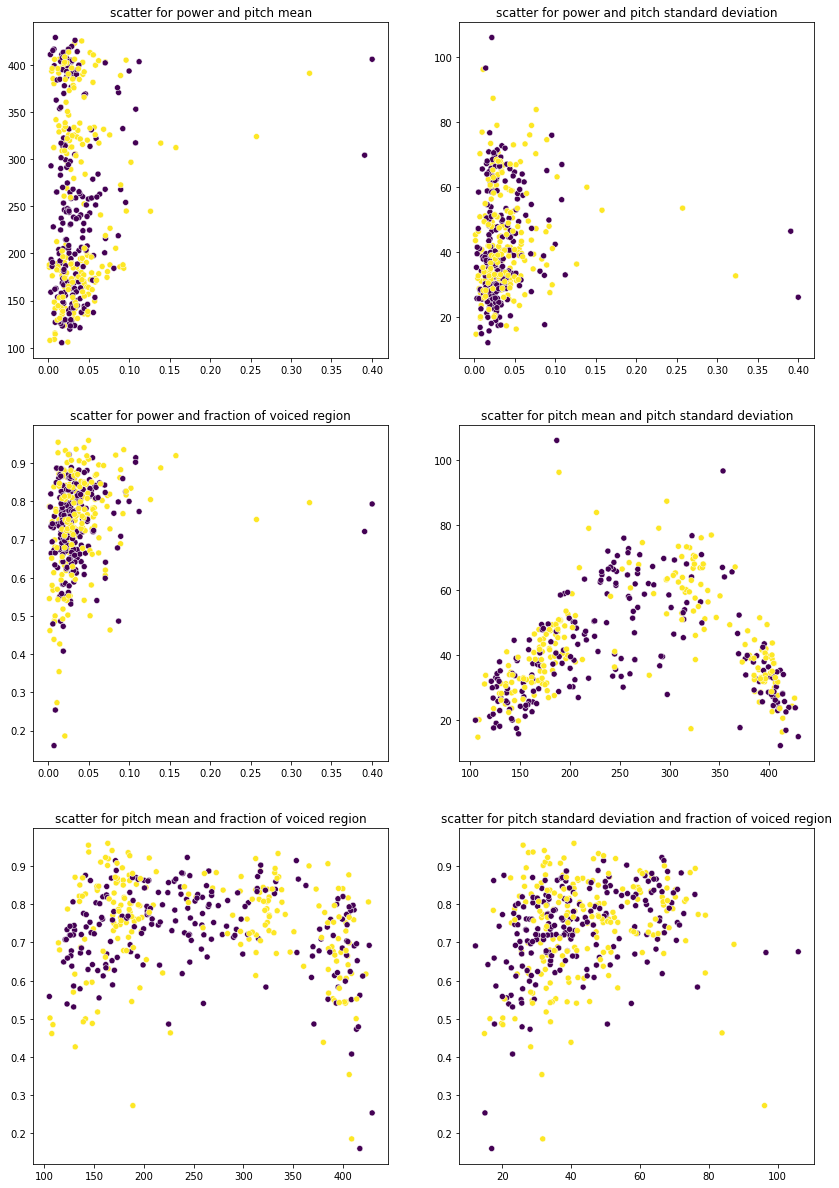

In [ ]:
plt.figure(figsize = (14, 21))
ax1 = plt.subplot(3,2,1)
sns.scatterplot(X[:,0], X[:,1], c=y, ax= ax1)
ax1.set_title("scatter for power and pitch mean")
ax2 = plt.subplot(3,2,2)
sns.scatterplot(X[:,0], X[:,2], c=y, ax= ax2)
ax2.set_title("scatter for power and pitch standard deviation")
ax3 = plt.subplot(3,2,3)
sns.scatterplot(X[:,0], X[:,3], c=y, ax= ax3)
ax3.set_title("scatter for power and fraction of voiced region")
ax4 = plt.subplot(3,2,4)
sns.scatterplot(X[:,1], X[:,2], c=y, ax= ax4)
ax4.set_title("scatter for pitch mean and pitch standard deviation")
ax5 = plt.subplot(3,2,5)
sns.scatterplot(X[:,1], X[:,3], c=y, ax= ax5)
ax5.set_title("scatter for pitch mean and fraction of voiced region")
ax6 = plt.subplot(3,2,6)
sns.scatterplot(X[:,2], X[:,3], c=y, ax= ax6)
ax6.set_title("scatter for pitch standard deviation and fraction of voiced region")

From the plots, we can see it is diffcult to seperate the potter and starwars using any of the two feature.
- Data of `Potter` and `StarWars` overlaps each other.

# 8 Results

Carry out your experiments here, explain your results.

##Training and validating with all data

###SVM
We will use the SVM method provided by scikit-learn.

Let's now fit several SVM models and plot both the training and validation accuracies as the regularisation parameter (`C`) increses.

In [ ]:
from sklearn import svm
Training_accuracy = []
Validation_accuracy = []

for n in range(1,40):
    model = svm.SVC(C=n)
    model.fit(X_train,y_train)

    Training_accuracy.append(model.score(X_train, y_train))
    Validation_accuracy.append(model.score(X_val, y_val))

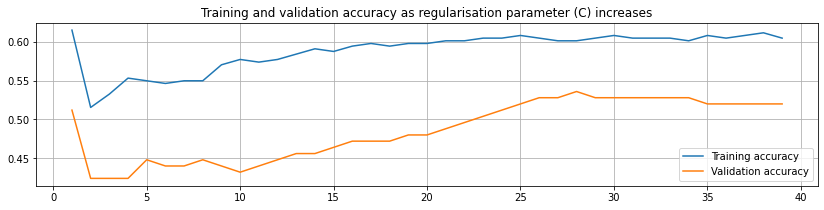

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Training_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as regularisation parameter (C) increases')
plt.grid()
plt.show()

In [ ]:
pd.options.display.float_format = "{:,.2f}".format
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, list(range(1,n+1)))),
               columns =['Training accuracy', 'Validation accuracy','C'])
df[df['Validation accuracy'] > 0.53]

,Training accuracy,Validation accuracy,C
27,0.60,0.54,28


From the plot, it looks like the validation accuracy peaked at `C` = 28.

We can fix `C` = 28 and start to tune the `gamma` parameter.

In [ ]:
from sklearn import svm
Training_accuracy = []
Validation_accuracy = []

for n in range(1,30):
    model = svm.SVC(C=28,gamma=n)
    model.fit(X_train,y_train)

    Training_accuracy.append(model.score(X_train, y_train))
    Validation_accuracy.append(model.score(X_val, y_val))

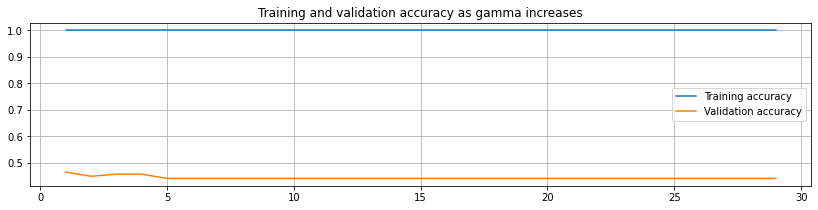

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Training_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as gamma increases')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, list(range(1,n+1)))),
               columns =['Training accuracy', 'Validation accuracy','gamma'])
df[df['Validation accuracy'] > 0.46]

,Training accuracy,Validation accuracy,gamma
0,1.00,0.46,1


From the plot, we can see that the model is overfitting for all `gamma` range from 1 to 29.
- The validation accuracies peaked at `gamma` = 1, but they were close to and lower than 0.5.
- So far the SVM classifier is not performing well at seperating the two classes.

#### normalise the predictors
Let's normalise the predictors, to see if the performance improves.

In [ ]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train_n = (X_train-mean)/sd
X_val_n  = (X_val-mean)/sd

In [ ]:
from sklearn import svm
Training_accuracy = []
Validation_accuracy = []

for n in range(1,30):
    model = svm.SVC(C=n)
    model.fit(X_train_n,y_train)

    Training_accuracy.append(model.score(X_train_n, y_train))
    Validation_accuracy.append(model.score(X_val_n, y_val))

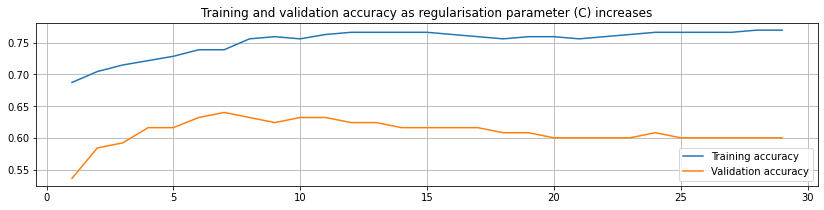

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Training_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as regularisation parameter (C) increases')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, list(range(1,n+1)))),
               columns =['Training accuracy', 'Validation accuracy','C'])
df[df['Validation accuracy'] > 0.635]

,Training accuracy,Validation accuracy,C
6,0.74,0.64,7


This time, validation accuracy peaked at `C` = 7.
- The models overfit.

Let's try to fix `C` = 7, and try differnt `gamma`.

In [ ]:
from sklearn import svm
Training_accuracy = []
Validation_accuracy = []

for n in range(1,30):
    model = svm.SVC(C=7,gamma=n)
    model.fit(X_train_n,y_train)

    Training_accuracy.append(model.score(X_train_n, y_train))
    Validation_accuracy.append(model.score(X_val_n, y_val))

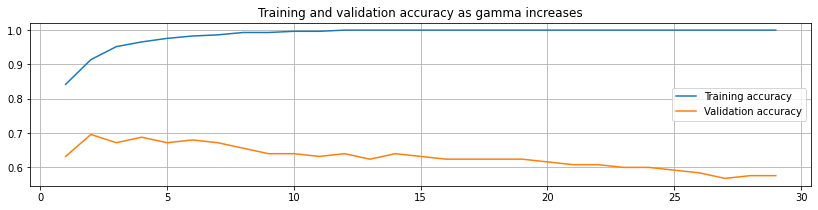

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Training_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as gamma increases')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, list(range(1,n+1)))),
               columns =['Training accuracy', 'Validation accuracy','gamma'])
df[df['Validation accuracy'] > 0.69]

,Training accuracy,Validation accuracy,gamma
1,0.91,0.70,2


The models overfit, and the validation accuracies peaked at `gamma` = 2.
- The best validation accuracy SVM models can achieve here is 0.7, when `C` = 7 and `gamma` = 2.

###KNeighborsClassifier
Let's try another classifier, KNeighborsClassifier. We will plot the traing and validation accuracy as number of neighbors increase from 1 to 50.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Training_accuracy = []
Validation_accuracy = []

for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    Training_accuracy.append(knn.score(X_train, y_train))
    Validation_accuracy.append(knn.score(X_val, y_val))

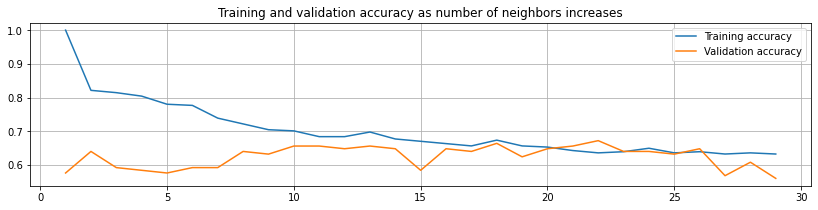

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Training_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as number of neighbors increases')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, list(range(1,n+1)))),
               columns =['Training accuracy', 'Validation accuracy', 'number of neighbors'])
df[df['Validation accuracy'] > 0.665]

,Training accuracy,Validation accuracy,number of neighbors
21,0.64,0.67,22


From the plot, we can see the training and validation accuracies approache to 0.65 as number of neighbors increase from 1 to 30.
- The validation accuracy reached 0.67 when number of neighbors is 22.

Let's see how will normalised data affect the results.

In [ ]:
Training_accuracy = []
Validation_accuracy = []

for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_n, y_train)

    Training_accuracy.append(knn.score(X_train_n, y_train))
    Validation_accuracy.append(knn.score(X_val_n, y_val))

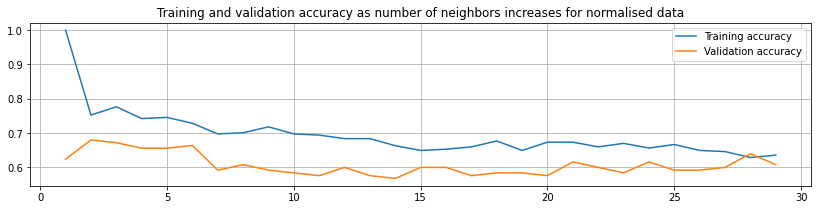

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Training_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as number of neighbors increases for normalised data')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, list(range(1,n+1)))),
               columns =['Training accuracy', 'Validation accuracy', 'number of neighbors'])
df[df['Validation accuracy'] > 0.675]

,Training accuracy,Validation accuracy,number of neighbors
1,0.75,0.68,2


The validation accuracy reached 0.68 when the number of neighbors is 2 after the data is normalised.
- This perfromence is close to the best result achieved by SVM classifier.
- However, we need to consider other factors when selecting our model.

###RandomForestClassifier
Let's try another classifier, RandomForestClassifier.
- We will try different number of estimators in the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Training_accuracy = []
Validation_accuracy = []

for n in range(1,30):

    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, y_train)

    Training_accuracy.append(rfc.score(X_train, y_train))
    Validation_accuracy.append(rfc.score(X_val, y_val))

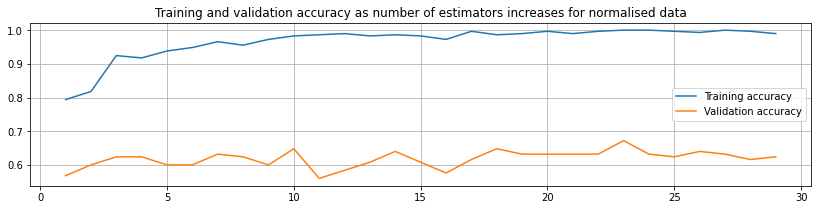

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Training_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as number of estimators increases')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, list(range(1,n+1)))),
               columns =['Training accuracy', 'Validation accuracy', 'number of estimators'])
df[df['Validation accuracy'] > 0.68]

,Training accuracy,Validation accuracy,number of estimators
9,0.99,0.69,10


From the plot, we can see the training accuracy is a lot higher than validation accuracy.
- The models are overfitting.
- The validation accuracy is 0.69 when the number of estimators is 10.

Let's try normalise the data and look at the result again.

In [ ]:
Training_accuracy = []
Validation_accuracy = []

for n in range(1,30):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train_n, y_train)

    Training_accuracy.append(rfc.score(X_train_n, y_train))
    Validation_accuracy.append(rfc.score(X_val_n, y_val))

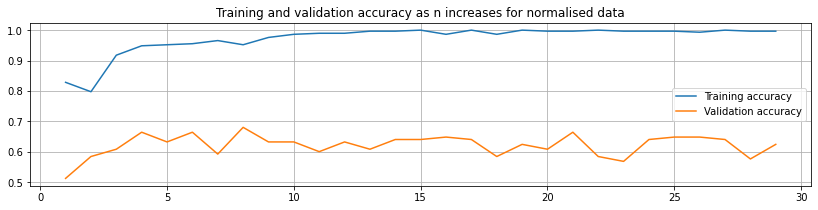

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Training_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as number of estimators increases for normalised data')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, list(range(1,n+1)))),
               columns =['Training accuracy', 'Validation accuracy', 'number of estimators'])
df[df['Validation accuracy'] > 0.66]

,Training accuracy,Validation accuracy,number of estimators
4,0.96,0.66,5
15,0.98,0.66,16
17,1.00,0.66,18


The results did not imporve.
- The models overfit.

### MLPClassifier
Let's try another classifier, Multi-layer Perceptron classifier (MLPClassifier).
- We will try different values for maximum number of iterations (`max_iters`).

In [ ]:
from sklearn.neural_network import MLPClassifier

Training_accuracy = []
Validation_accuracy = []
s = [100*n for n in range(1, 30)]

for s in s:
    mlp = MLPClassifier(max_iter=s)
    mlp.fit(X_train, y_train)

    Training_accuracy.append(mlp.score(X_train, y_train))
    Validation_accuracy.append(mlp.score(X_val, y_val))

In [ ]:
s = [100*n for n in range(1, 30)]

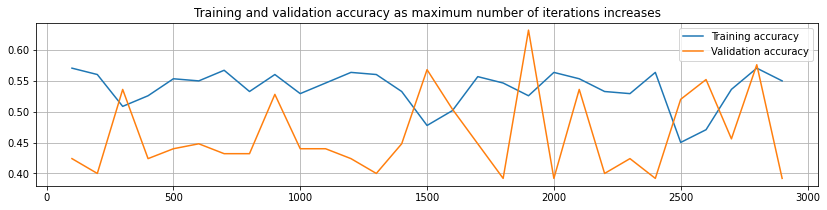

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(s), Training_accuracy, label = "Training accuracy")
plt.plot(list(s), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as maximum number of iterations increases')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, s)),
               columns =['Training accuracy', 'Validation accuracy', 'maximum number of iterations'])
df[df['Validation accuracy'] > 0.63]

,Training accuracy,Validation accuracy,maximum number of iterations
18,0.53,0.63,1900


The validation accruacy is the highest (0.63) when the maximum number of iterations is 1900.

We will fix the maximum number of iterations at 1900 and try different values for hidden layer sizes.

In [ ]:
from sklearn.neural_network import MLPClassifier

Training_accuracy = []
Validation_accuracy = []
s = [500*n for n in range(1, 10)]

for s in s:
    mlp = MLPClassifier(hidden_layer_sizes=s, max_iter=1900)
    mlp.fit(X_train, y_train)

    Training_accuracy.append(mlp.score(X_train, y_train))
    Validation_accuracy.append(mlp.score(X_val, y_val))

In [ ]:
s = [500*n for n in range(1, 10)]

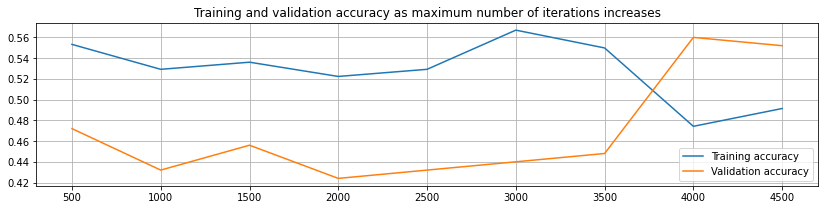

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(s), Training_accuracy, label = "Training accuracy")
plt.plot(list(s), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as hidden layer sizes increases')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, s)),
               columns =['Training accuracy', 'Validation accuracy', 'hidden layer sizes'])
df[df['Validation accuracy'] > 0.555]

,Training accuracy,Validation accuracy,hidden layer sizes
7,0.47,0.56,4000


The validation accuracy did not improve as we tried different values for hidden layer sizes.
- The highest validation accuracy here is 0.56 when the hidden layer size si 4000.

Let's try normalising the data.

In [ ]:
Training_accuracy = []
Validation_accuracy = []
s = [100*n for n in range(1, 30)]

for s in s:
    mlp = MLPClassifier(max_iter=s)
    mlp.fit(X_train_n, y_train)

    Training_accuracy.append(mlp.score(X_train_n, y_train))
    Validation_accuracy.append(mlp.score(X_val_n, y_val))

In [ ]:
s = [100*n for n in range(1, 30)]

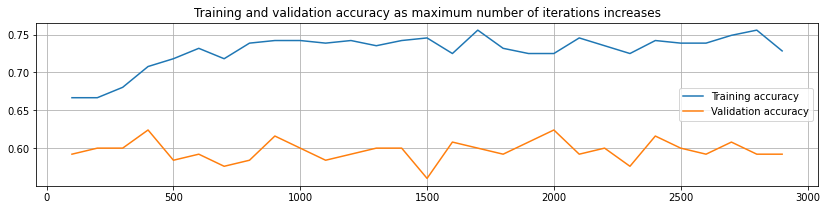

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(s), Training_accuracy, label = "Training accuracy")
plt.plot(list(s), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as maximum number of iterations increases')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, s)),
               columns =['Training accuracy', 'Validation accuracy', 'maximum number of iterations'])
df[df['Validation accuracy'] > 0.62]

,Training accuracy,Validation accuracy,maximum number of iterations
3,0.71,0.62,400
19,0.73,0.62,2000


Here, validation accuracies are 0.62 when maximum number of iterations are 400 and 2000.
- This result did not improve from that of using data that is not normalised.

Let's fix the maximum number of iterations at 400, and try different values for hidden layer sizes.

In [ ]:
Training_accuracy = []
Validation_accuracy = []
s = [500*n for n in range(1, 10)]

for s in s:
    mlp = MLPClassifier(hidden_layer_sizes=s, max_iter=400)
    mlp.fit(X_train_n, y_train)

    Training_accuracy.append(mlp.score(X_train_n, y_train))
    Validation_accuracy.append(mlp.score(X_val_n, y_val))

In [ ]:
s = [500*n for n in range(1, 10)]

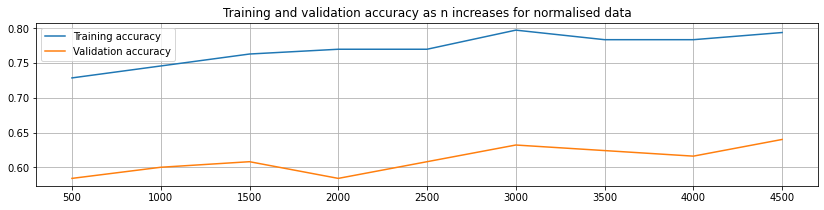

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(list(s), Training_accuracy, label = "Training accuracy")
plt.plot(list(s), Validation_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and validation accuracy as n increases for normalised data')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(Training_accuracy, Validation_accuracy, s)),
               columns =['Training accuracy', 'Validation accuracy', 'hidden layer sizes'])
df[df['Validation accuracy'] > 0.635]

,Training accuracy,Validation accuracy,hidden layer sizes
8,0.79,0.64,4500


The validation accuracy peaked at 0.64 when the hidden layer size is 4500.

# 9 Conclusions

Your conclusions, improvements, etc should go here

Table below shows the best validation accuracy achieved by each model:

| Model | Best validation accuracy |
|-------|--------------------------|
|SVM|                          0.70|
|KNeighborsClassifier|         0.68|
|Random forest classifier|     0.69|
|MLPClassifier|                0.64|

- Even though SVM achieved the highest validation accuracy, which is an estimate of the deployment accuracy, we have to consider other factors when we choose the best model.
- In the visualisation section, we have seen the data points of the two labels are overlapping.
    - It is very diffcult to seperate the data points of the two labels with one decision boundary. Therefore, SVM is not a suitable candidate for our task.
- The random forest classifier could be a better model for classifing our data.
    - This is because random forest classifier does not simply draw one decision boundary.
    - It seperates the data into small samples and builds multiple decision regions.
    - This way of classification could be more suitable for our data.
- Therefore, the model we choose is the random froest classifier.

Improvements:
- When there are two hyper parameters we could have tuened them together.
- We could have extracted other features so that the data points of the two labels would not be overlapping so much.
- We could have tried other classifiers that may have better performances.